In [1]:
import pandas as pd
import numpy as np
from scipy import c_, stats
import patsy

import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
print(df.shape)

(10127, 23)


In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
df = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

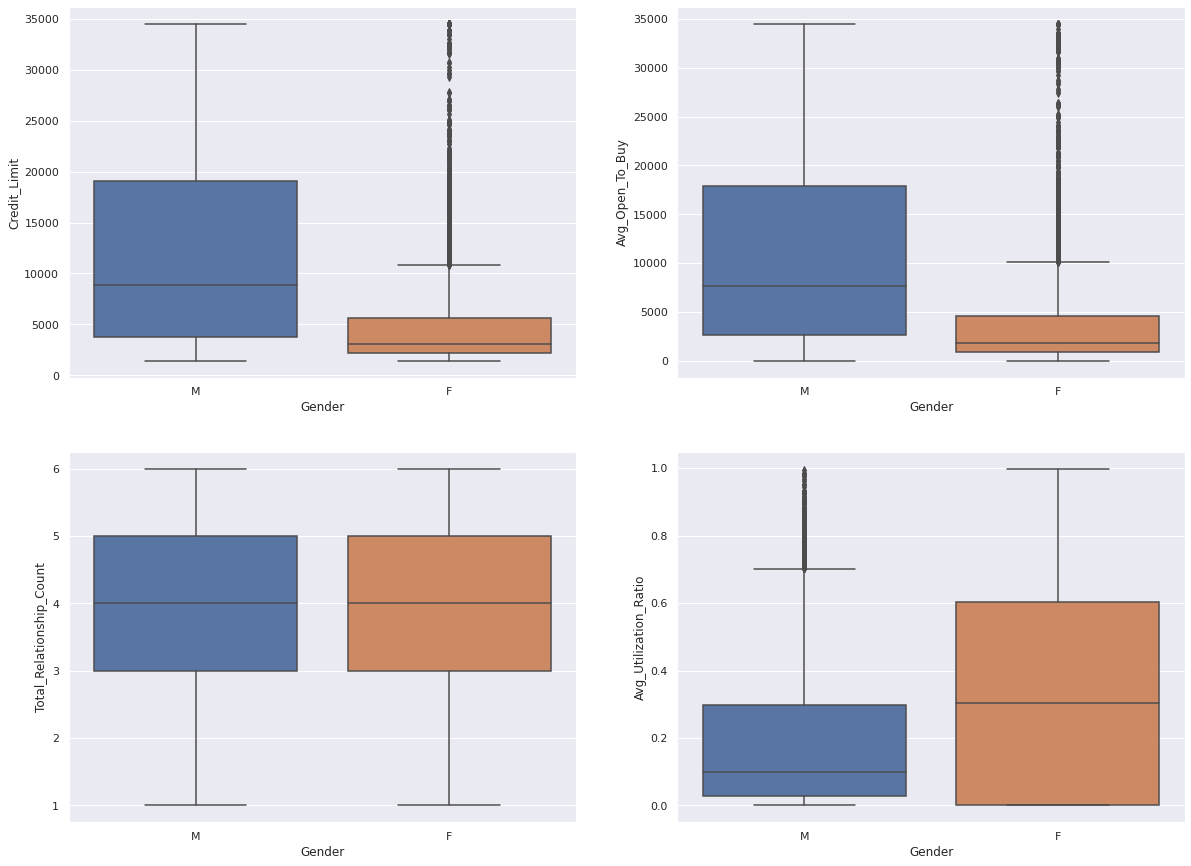

In [4]:
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')

plt.subplot(2,2,1)
sns.boxplot(x='Gender', y='Credit_Limit',data=df);

plt.subplot(2,2,2)
sns.boxplot(x='Gender', y='Avg_Open_To_Buy',data=df);

plt.subplot(2,2,3)
sns.boxplot(x='Gender', y='Total_Relationship_Count',data=df);

plt.subplot(2,2,4)
sns.boxplot(x='Gender', y='Avg_Utilization_Ratio',data=df);


/home/adam_s/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/adam_s/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/adam_s/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

Text(0.5, 1.0, 'Avg_Open_To_Buy Interval')

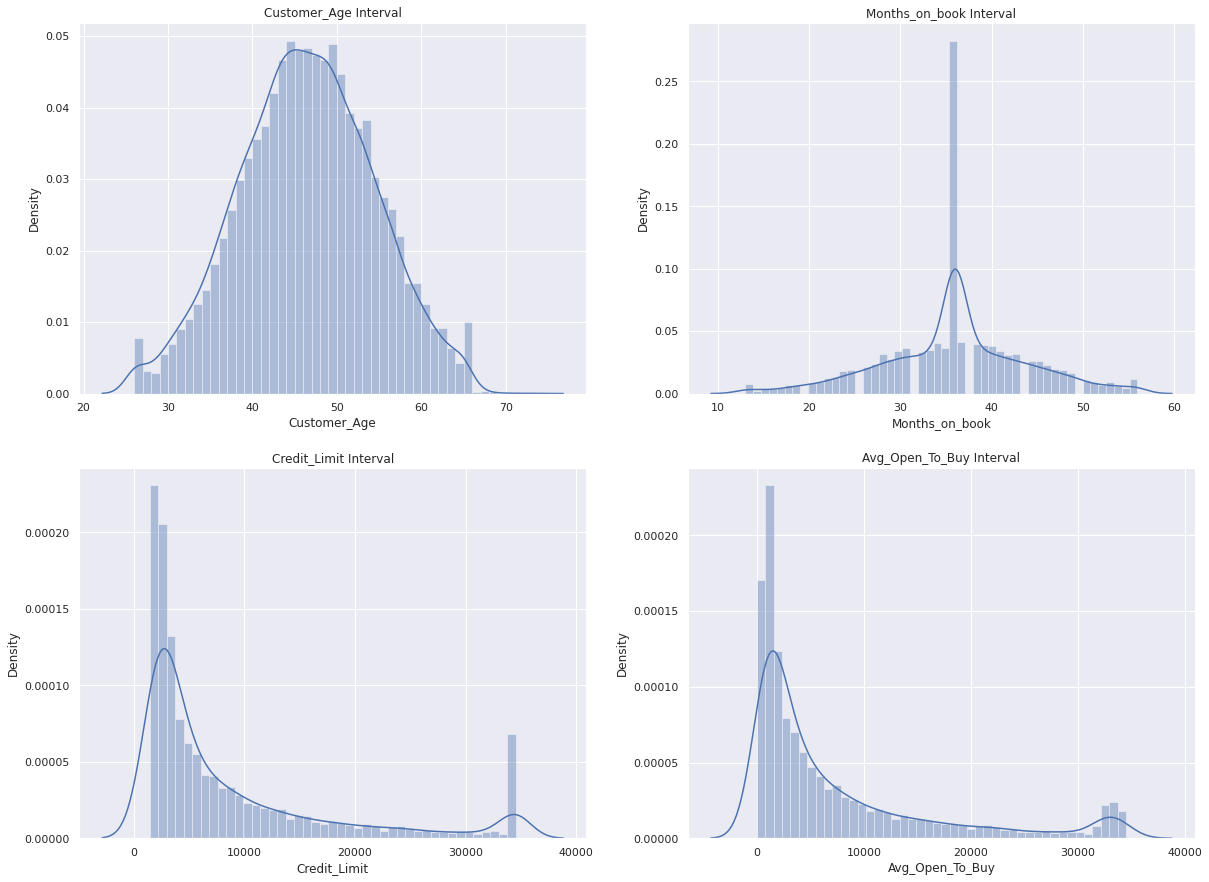

In [7]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.distplot(df['Customer_Age']).set_title('Customer_Age Interval')

plt.subplot(2,2,2)
sns.distplot(df['Months_on_book']).set_title('Months_on_book Interval')

plt.subplot(2,2,3)
sns.distplot(df['Credit_Limit']).set_title('Credit_Limit Interval')

plt.subplot(2,2,4)
sns.distplot(df['Avg_Open_To_Buy']).set_title('Avg_Open_To_Buy Interval')

In [7]:
pd.DataFrame.info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [8]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [9]:
df.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

In [10]:
for col in df:
    print(df[col].unique())

['Existing Customer' 'Attrited Customer']
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
['M' 'F']
[3 5 4 2 0 1]
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
[5 6 4 3 2 1]
[1 4 2 3 6 0 5]
[3 2 0 1 4 5 6]
[12691.  8256.  3418. ...  5409.  5281. 10388.]
[ 777  864    0 ...  534  476 2241]
[11914.  7392.  3418. ... 11831.  5409.  8427.]
[1.335 1.541 2.594 ... 0.222 0.204 0.166]
[ 1144  1291  1887 ... 10291  8395 10294]
[ 42  33  20  28  24  31  36  32  26  17  29  27  21  30  16  18  23  22
  40  38  25  43  37  19  35  15  41  57  12  14  34  44  13  47  10  39
  5

In [7]:
df.drop(df[df['Marital_Status'] == "Unknown"].index, inplace=True)
df.drop(df[df['Income_Category'] == "Unknown"].index, inplace=True)
df.drop(df[df['Education_Level'] == "Unknown"].index, inplace=True)
#df.drop(df[df['Card_Category'] == "Unknown"].index, inplace=True)

In [12]:
for col in df:
    print(df[col].unique())

['Existing Customer' 'Attrited Customer']
[45 49 51 40 44 37 48 56 57 61 47 62 41 53 58 55 42 50 59 46 52 54 66 39
 43 64 67 60 68 63 73 70 35 34 38 36 65 33 26 31 29 30 32 28 27]
['M' 'F']
[3 5 2 1 4 0]
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
['Blue' 'Gold' 'Silver' 'Platinum']
[39 44 36 21 48 56 42 49 33 28 38 41 43 37 30 45 52 40 54 50 34 35 32 20
 29 47 31 46 27 53 24 55 23 22 26 25 13 51 15 17 19 18 16 14]
[5 6 4 3 2 1]
[1 2 3 6 0 5 4]
[3 2 0 1 4 5 6]
[12691.  8256.  3418. ...  4003.  5409. 10388.]
[ 777  864    0 ... 1500  476 2241]
[11914.  7392.  3418. ... 11831.  5409.  8427.]
[1.335 1.541 2.594 ... 0.225 0.202 0.222]
[ 1144  1291  1887 ... 15476 10291 10294]
[ 42  33  20  28  24  32  17  29  27  30  16  18  22  38  26  43  37  40
  19  15  23  35  41  36  57  31  14  21  34  25  13  47  10  39  53  50
  52  48  12  49  44  11  55  46  

In [13]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [7]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [8]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace(['Existing Customer'],'1')
df['Attrition_Flag'] = df['Attrition_Flag'].replace(['Attrited Customer'],'0')

In [9]:
df["Attrition_Flag"].describe()

count     7081
unique       2
top          1
freq      5968
Name: Attrition_Flag, dtype: object

In [10]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,1,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [10]:
lst = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
remove = list()

for i in lst:
    if (df[i].dtype == np.str or df[i].dtype == np.object):
        for j in df[i].unique():
            df[i+'_'+j] = np.where(df[i] == j,1,0)
        remove.append(i)
df = df.drop(remove, axis=1)

In [11]:
Xtrain = pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
Xtrain = Xtrain.drop(['Attrition_Flag'],axis=1)


In [12]:
Xtrain

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,1,0,0,1,0,0,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,1,0,0,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,1,0,0,0,1,0,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,1,1,0,0,1,0,0,0,0,0
5,44,2,36,3,1,2,4010.0,1247,2763.0,1.376,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,54,1,34,5,2,0,13940.0,2109,11831.0,0.660,...,0,0,1,0,1,0,0,0,0,0
10121,56,1,50,4,1,4,3688.0,606,3082.0,0.570,...,0,0,1,0,0,0,1,0,0,0
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0,0,1,1,0,0,0,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0,1,0,0,0,0,1,0,0,0


In [20]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,1,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,1,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,1,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,0,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [13]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [13]:
y = df['Attrition_Flag']

In [35]:
y.astype(float).describe()

count    7081.000000
mean        0.842819
std         0.363997
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Attrition_Flag, dtype: float64

In [263]:
X = df[[
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio',
    'Gender_M',
    'Education_Level_High School',
    'Education_Level_Graduate',
    'Education_Level_Uneducated',
    'Education_Level_College',
    'Education_Level_Post-Graduate',
    'Education_Level_Doctorate',
    'Marital_Status_Married',
    'Marital_Status_Single',
    'Marital_Status_Divorced',
    'Income_Category_$60K - $80K',
    'Income_Category_Less than $40K',
    'Income_Category_$80K - $120K',
    'Income_Category_$40K - $60K',
    'Income_Category_$120K +',
    'Card_Category_Gold',
    'Card_Category_Silver',
    'Card_Category_Platinum']]

KeyError: "['Gender_M', 'Education_Level_High School', 'Education_Level_Graduate', 'Education_Level_Uneducated', 'Education_Level_College', 'Education_Level_Post-Graduate', 'Education_Level_Doctorate', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Divorced', 'Income_Category_$60K - $80K', 'Income_Category_Less than $40K', 'Income_Category_$80K - $120K', 'Income_Category_$40K - $60K', 'Income_Category_$120K +', 'Card_Category_Gold', 'Card_Category_Silver', 'Card_Category_Platinum'] not in index"

In [50]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Divorced,Income_Category_$60K - $80K,Income_Category_Less than $40K,Income_Category_$80K - $120K,Income_Category_$40K - $60K,Income_Category_$120K +,Card_Category_Gold,Card_Category_Silver,Card_Category_Platinum
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,0,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,1,0,0,1,0,0,0,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,0,1,0,0,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,1,0,0,0,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,0,0,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, y, random_state=42)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**XGBoost**

In [51]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [83]:
model_xgb = xgb.XGBClassifier()

In [84]:
param_grid_xgb = [
{'n_estimators': [100], 'learning_rate': [0.1,0.2]}]
#{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},

fit_params={
    "eval_set":[(X_test, y_test)],
    "eval_metric": 'mlogloss',
    "early_stopping_rounds":100,
    "verbose":True
}

In [85]:
grid_search = GridSearchCV(model_xgb, param_grid_xgb, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:55:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [86]:
grid_search.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [87]:
model_xgb = xgb.XGBClassifier(n_estimators = 100, learning_rate=0.2)

In [88]:
model_xgb.fit(X_train, y_train)
print(model_xgb)

[18:56:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [89]:
#y_test_xgb  = y_test

predicted_y_xgb = model_xgb.predict(X_test)

print(metrics.accuracy_score(y_test, predicted_y_xgb))
print(metrics.classification_report(y_test, predicted_y_xgb))
print(metrics.confusion_matrix(y_test, predicted_y_xgb))

0.9734613212874083
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       271
           1       0.98      0.99      0.98      1500

    accuracy                           0.97      1771
   macro avg       0.96      0.93      0.95      1771
weighted avg       0.97      0.97      0.97      1771

[[ 236   35]
 [  12 1488]]


In [66]:
predicted_y_xgb

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

**RANDOM FOREST**

In [51]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [67]:
param_grid_rf = [
{'n_estimators': [300, 500, 1000], 'max_features': [2, 4, 6, 8]}]
#{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},


In [74]:
rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid_rf, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [300, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [75]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 1000}

In [76]:
grid_search.score(X_train, y_train)

1.0

In [77]:
grid_search.score(X_test, y_test)

0.9576510446075663

In [78]:
predicted_y_rf_gs = grid_search.predict(X_test)

In [79]:
print(metrics.accuracy_score(y_test, predicted_y_rf_gs))
print(metrics.confusion_matrix(y_test, predicted_y_rf_gs))
print(metrics.classification_report(y_test, predicted_y_rf_gs))

0.9576510446075663
[[ 218   53]
 [  22 1478]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       271
           1       0.97      0.99      0.98      1500

    accuracy                           0.96      1771
   macro avg       0.94      0.89      0.91      1771
weighted avg       0.96      0.96      0.96      1771



In [80]:
rf = RandomForestClassifier(n_estimators = 1000, max_features = 8, random_state=42)

rf.fit(X_train, y_train)

predicted_y_rf=rf.predict(X_test)

In [81]:
print(metrics.accuracy_score(y_test, predicted_y_rf))
print(metrics.confusion_matrix(y_test, predicted_y_rf))
print(metrics.classification_report(y_test, predicted_y_rf))

0.9576510446075663
[[ 217   54]
 [  21 1479]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       271
           1       0.96      0.99      0.98      1500

    accuracy                           0.96      1771
   macro avg       0.94      0.89      0.91      1771
weighted avg       0.96      0.96      0.96      1771



In [82]:
feature_imp_rf = pd.Series(rf.feature_importances_,index=Xtrain.columns).sort_values(ascending=False)
feature_imp_rf

Total_Trans_Ct                    0.186419
Total_Trans_Amt                   0.185636
Total_Revolving_Bal               0.124952
Total_Ct_Chng_Q4_Q1               0.102563
Total_Relationship_Count          0.065632
Avg_Utilization_Ratio             0.061657
Total_Amt_Chng_Q4_Q1              0.060818
Customer_Age                      0.033648
Avg_Open_To_Buy                   0.028201
Credit_Limit                      0.027117
Months_on_book                    0.024264
Months_Inactive_12_mon            0.023519
Contacts_Count_12_mon             0.021214
Dependent_count                   0.011371
Gender_M                          0.006985
Marital_Status_Married            0.004932
Marital_Status_Single             0.003757
Income_Category_Less than $40K    0.003344
Income_Category_$80K - $120K      0.003128
Education_Level_Graduate          0.003061
Education_Level_Uneducated        0.002719
Education_Level_High School       0.002586
Income_Category_$40K - $60K       0.002585
Education_L

**Regresja logistyczna**

In [91]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
#print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     #.format(logreg.score(X_train, y_train)))
#print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     #.format(logreg.score(X_test, y_test)))

LogisticRegression(random_state=42)

In [92]:
predicted_y_logreg = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_y_logreg))
print(metrics.confusion_matrix(y_test, predicted_y_logreg))
print(metrics.classification_report(y_test, predicted_y_logreg))

0.9011857707509882
[[ 138  133]
 [  42 1458]]
              precision    recall  f1-score   support

           0       0.77      0.51      0.61       271
           1       0.92      0.97      0.94      1500

    accuracy                           0.90      1771
   macro avg       0.84      0.74      0.78      1771
weighted avg       0.89      0.90      0.89      1771



In [93]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [94]:
x = logreg.coef_
x

array([[ 3.88267997e-01, -4.73211133e-01,  3.44497506e-01,
         1.96307845e+00, -2.44366089e+00, -2.49149426e+00,
         3.35384126e-01,  1.87856046e+00,  1.78384976e-01,
         1.69219136e+00, -4.67403550e+00,  1.01505044e+01,
         5.83741906e+00,  5.43822173e-01,  7.50983998e-01,
        -4.74754147e-01, -8.39373364e-03,  7.29329116e-02,
        -2.16523974e-01,  8.63353724e-02,  4.92202298e-01,
         9.87287275e-03,  6.48322841e-01,  3.59618251e-01,
         5.47182577e-02,  5.41289034e-01, -6.69992615e-01,
        -7.17246613e-01, -3.44224298e-01]])

In [97]:
np.exp(logreg.coef_)

array([[1.47442487e+00, 6.22998522e-01, 1.41128058e+00, 7.12121564e+00,
        8.68423482e-02, 8.27861702e-02, 1.39847747e+00, 6.54407765e+00,
        1.19528539e+00, 5.43136974e+00, 9.33452393e-03, 2.56040142e+04,
        3.42893212e+02, 1.72257829e+00, 2.11908417e+00, 6.22037968e-01,
        9.91641395e-01, 1.07565837e+00, 8.05313228e-01, 1.09017188e+00,
        1.63591503e+00, 1.00992177e+00, 1.91233085e+00, 1.43278235e+00,
        1.05624298e+00, 1.71822028e+00, 5.11712357e-01, 4.88094320e-01,
        7.08769935e-01]])

**SVM**

In [98]:
param_grid_svmc = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}

In [99]:
svmc = svm.SVC()

grid_search = GridSearchCV(svmc, param_grid_svmc, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

In [100]:
grid_search.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [104]:
grid_search.score(X_test, y_test)

0.9147374364765669

In [105]:
predicted_y_svmc_gs = grid_search.predict(X_test)

In [106]:
svmc = svm.SVC(kernel='rbf', C = 100, gamma = 0.1)
svmc.fit(X_train, y_train)
predicted_y_svmc = svmc.predict(X_test)

In [107]:
print(metrics.accuracy_score(y_test, predicted_y_svmc))
print(metrics.confusion_matrix(y_test, predicted_y_svmc))
print(metrics.classification_report(y_test, predicted_y_svmc))

0.9147374364765669
[[ 171  100]
 [  51 1449]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       271
           1       0.94      0.97      0.95      1500

    accuracy                           0.91      1771
   macro avg       0.85      0.80      0.82      1771
weighted avg       0.91      0.91      0.91      1771



In [108]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = metrics.roc_curve([int(i) for i in y_test], random_probs)
fpr_xgb, tpr_xgb, thresholds_xgb = metrics.roc_curve([int(i) for i in y_test],[int(i) for i in predicted_y_xgb])
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve([int(i) for i in y_test],[int(i) for i in predicted_y_rf])
fpr_logreg, tpr_logreg, thresholds_logreg = metrics.roc_curve([int(i) for i in y_test],[int(i) for i in predicted_y_logreg])
fpr_svmc, tpr_svmc, thresholds_svmc = metrics.roc_curve([int(i) for i in y_test],[int(i) for i in predicted_y_svmc])

In [109]:
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)
roc_auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)
roc_auc_svmc = metrics.auc(fpr_svmc, tpr_svmc)
print("auc dla xgb:", roc_auc_xgb)
print("auc dla rf:", roc_auc_rf)
print("auc dla logreg:", roc_auc_logreg)
print("auc dla svmc:", roc_auc_svmc)

auc dla xgb: 0.9314243542435424
auc dla rf: 0.8933690036900369
auc dla logreg: 0.7406125461254612
auc dla svmc: 0.7984981549815499


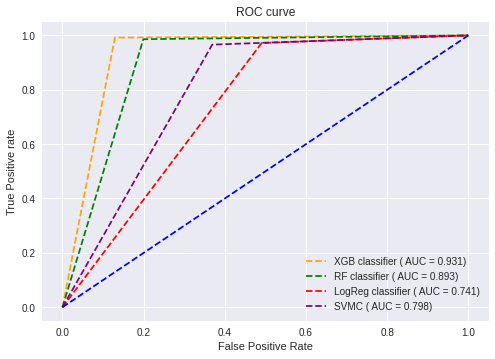

[18:54:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.

[18:54:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [110]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_xgb, tpr_xgb, linestyle='--',color='orange')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='green')
plt.plot(fpr_logreg, tpr_logreg, linestyle='--',color='red')
plt.plot(fpr_svmc, tpr_svmc, linestyle='--',color='purple')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(['XGB classifier ( AUC = ' "{:.3f})".format(roc_auc_xgb),
            'RF classifier ( AUC = ' "{:.3f})".format(roc_auc_rf),
            'LogReg classifier ( AUC = ' "{:.3f})".format(roc_auc_logreg),
            'SVMC ( AUC = ' "{:.3f})".format(roc_auc_svmc)],
            loc='lower right')
plt.savefig('ROC',dpi=300)
plt.show()